In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.special import boxcox1p

from heamy.dataset import Dataset
from heamy.estimator import Classifier
from heamy.pipeline import ModelsPipeline

import os

train = pd.read_csv('./input/train.csv')
#test = pd.read_csv('./input/test.csv')
#ommiting test data as it is too large.


target_values = train.Cover_Type.values

temp = train


#df =  pd.concat([temp, test], axis=0).reset_index(drop=True)
df = train

In [6]:
#Creating new features
df['Radial_Distance_To_Hydrology'] = np.sqrt((df['Horizontal_Distance_To_Hydrology'])**2 + (df['Vertical_Distance_To_Hydrology']**2))
g = df.Elevation.mean()
df['Elevation_normal_sq'] = df['Elevation'].apply(lambda x: (x - g)**2)
df["Slope*Elevation"] = df["Slope"] * df["Elevation"]
df["Vertical_Distance_To_Hydrology"] = abs(df['Vertical_Distance_To_Hydrology'])


In [7]:
tempdf = df.iloc[:,1:10]
tempdf.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
0,2596,51,3,258,0,510,221,232,148
1,2590,56,2,212,6,390,220,235,151
2,2804,139,9,268,65,3180,234,238,135
3,2785,155,18,242,118,3090,238,238,122
4,2595,45,2,153,1,391,220,234,150


<AxesSubplot:>

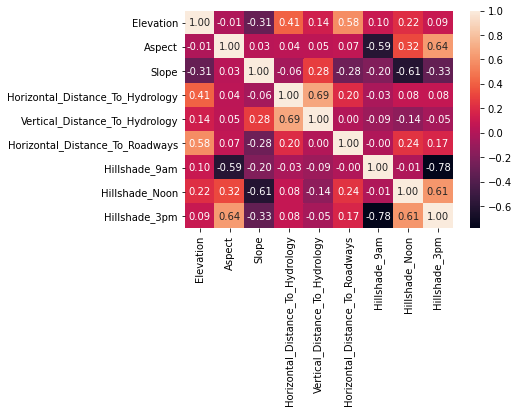

In [8]:
sns.heatmap(tempdf.corr(),annot = True,fmt = '.2f')

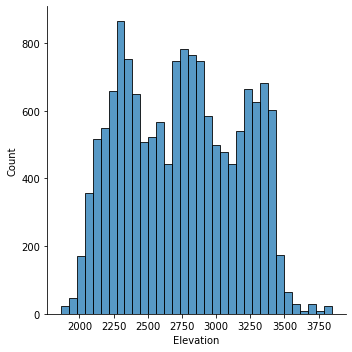

In [10]:
sns.displot(df.Elevation)

<AxesSubplot:ylabel='median'>

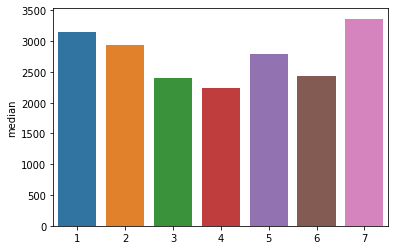

In [14]:
g = train.groupby('Cover_Type').Elevation.agg([np.median])
f = g.index.values
sns.barplot(x = f, y = 'median',data = g)

<AxesSubplot:ylabel='median'>

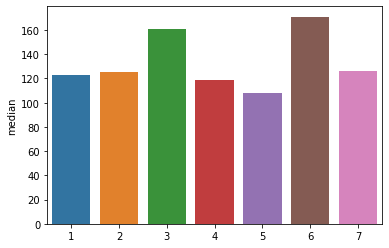

In [15]:
g = train.groupby('Cover_Type').Aspect.agg([np.median])
f = g.index.values
sns.barplot(x = f, y = 'median',data = g)

c:\users\shygu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Slope', ylabel='Density'>

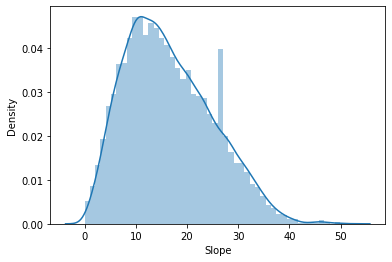

In [16]:
sns.distplot(df.Slope)

c:\users\shygu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology', ylabel='Density'>

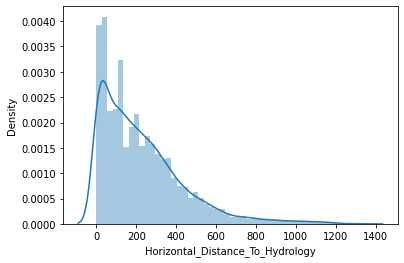

In [17]:
sns.distplot(df.Horizontal_Distance_To_Hydrology)

<AxesSubplot:ylabel='median'>

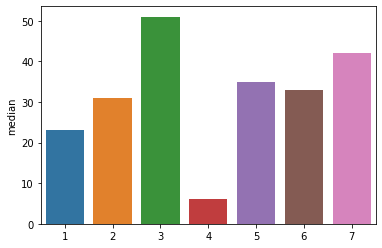

In [18]:
g = train.groupby('Cover_Type').Vertical_Distance_To_Hydrology.agg([np.median])
f = g.index.values
sns.barplot(x = f, y = 'median',data = g)

<ipython-input-19-5a81e47d1bc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Target'] = target_values


<AxesSubplot:xlabel='Target', ylabel='value'>

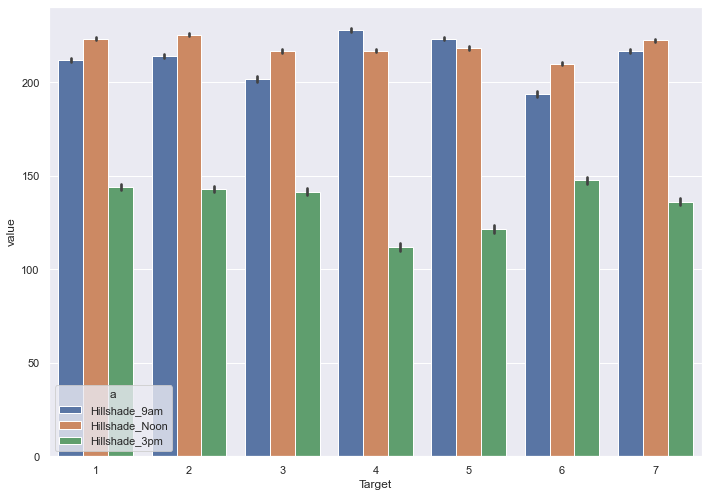

In [19]:
df.head()
tempdf = train.iloc[:,7:10]
tempdf['Target'] = target_values
tempdf
tempdf = pd.melt(tempdf,id_vars = ['Target'],var_name = 'a')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Target', y= 'value',data = tempdf,hue = 'a')

In [20]:
train.groupby('Cover_Type').sum()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,17271528,6756536,344441,28324,586456,89168,5572186,457251,482217,311182,...,114,230,184,0,3,0,0,80,79,49
2,13635425,6312687,326370,28995,621494,102250,5239710,462336,486799,308774,...,97,255,184,12,1,2,0,7,3,3
3,17555481,5180594,375133,44558,455162,138417,2094327,435576,467772,305747,...,0,5,0,0,0,0,0,0,0,0
4,13725905,4802588,298295,39892,225801,86710,1976617,492411,468482,241507,...,0,0,0,0,0,0,0,0,0,0
5,14011489,6019491,298063,36125,451166,109882,2871328,482477,471565,262208,...,87,100,115,4,0,0,0,0,0,0
6,17412419,5234278,390133,41010,345806,96927,2300358,418096,453515,318994,...,7,30,66,2,0,0,0,0,0,0
7,20702513,7263583,336516,30600,749314,148923,5861505,467942,480410,294179,...,27,70,67,4,98,8,34,641,575,407


In [24]:
#Assembling the pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import log_loss

kfold = StratifiedKFold(n_splits = 10)



x_shape = train.shape[0]
NFOLDS = 5
random_state = 31
x_train = df.iloc[:x_shape]
x_test = df.iloc[x_shape:]
y_train = target_values


In [ ]:
models = [RandomForestClassifier(random_state = random_state),
         ExtraTreesClassifier(),GradientBoostingClassifier(random_state = random_state)]
lst = []
for model in models:
    r = cross_val_score(model,x_train,y_train,scoring = 'accuracy',cv = kfold,n_jobs = 4)
    lst.append(r.mean())
results = pd.DataFrame(lst, columns = ['1'])
results

In [25]:
df = Dataset(x_train,y_train,x_test)

In [26]:
rf_params = {
    'n_estimators': 200,
    'criterion': 'entropy',
    'random_state': 0
}


et_params = {
    'n_estimators': 200,
    'criterion': 'entropy',
    'random_state': 0
}


lgb_params = {
    'n_estimators': 900, 
    'learning_rate':0.1
}

logr_params = {
        'solver' : 'liblinear',
        'multi_class' : 'ovr',
        'C': 1,
        'random_state': 0}
gbm_params = {
    'n_estimators' : 200,
    'learning_rate' : 0.1
}

In [28]:
rf = Classifier(dataset = df,estimator = RandomForestClassifier,parameters = rf_params,name = 'rf')
et = Classifier(dataset=df, estimator = ExtraTreesClassifier, parameters=et_params,name='et')   
gbm = Classifier(dataset=df,estimator=GradientBoostingClassifier, name='gbm')
logr = Classifier(dataset=df, estimator=LogisticRegression, parameters=logr_params,name='logr')

In [ ]:
pipeline = ModelsPipeline(rf,et,lgbc,gbm,logr)

stack_ds = pipeline.stack(k = NFOLDS, seed = random_state )

In [ ]:
lr = LogisticRegression
lr_params = {'C': 5, 'random_state' : random_state, 'solver' : 'liblinear', 'multi_class' : 'ovr',}
stacker = Classifier(dataset=stack_ds, estimator=lr, parameters=lr_params)

In [ ]:
results = stacker.validate(k=NFOLDS,scorer=log_loss)

In [ ]:
preds_proba = stacker.predict() 
predictions = np.round(np.argmax(preds_proba, axis=1)).astype(int) + 1
predictions